# Chapter 2 – Random Number Generators

This chapter includes:
- Lagged Fibonacci Generator
- Linear Congruential Generator
- Learmouth-Lewis Generator
- Uniformity Test
- Encrypt/Decrypt Strings
- Random Password Generator
- Random Sampling & City Selection


In [ ]:
# Random Walk in Python

import random  # Import Python's built-in random module

position = 0           # Start at position 0
walk = [position]      # List to keep track of positions during the walk

for _ in range(10):    # Perform 10 steps
    # Randomly choose step direction: +1 (right) or -1 (left)
    # If random number > 0.5, go right; else, go left
    step = 1 if random.random() > 0.5 else -1

    position += step   # Update position by adding step
    walk.append(position)  # Record new position in the walk

print(walk)  # Print the list of positions after each step

[0, 1, 2, 1, 0, -1, -2, -1, 0, -1, -2]


In [ ]:
import numpy as np  # Import the NumPy library for numerical operations

# Generate random numbers from a Poisson distribution
# lam = 3 means average 3 events per interval
# size = 10 means we want 10 such intervals
events = np.random.poisson(lam=3, size=10)

print(events)  # Output a sample of how many events occurred in each of the 10 intervals


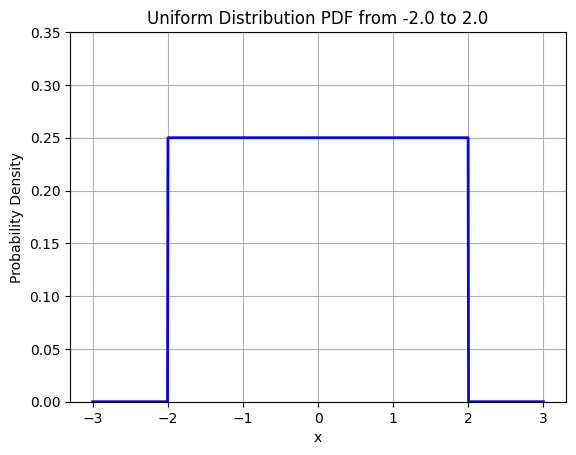

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define n (width of the interval)
n = 4  # example width

# Define x values from -n/2 to n/2 with some margin
x = np.linspace(-n/2 - 1, n/2 + 1, 1000)

# Uniform PDF values: height 1/n within [-n/2, n/2], zero elsewhere
pdf = np.where((x >= -n/2) & (x <= n/2), 1/n, 0)

# Plot the PDF curve
plt.plot(x, pdf, 'b-', lw=2)

# Add title and labels
plt.title(f"Uniform Distribution PDF from {-n/2} to {n/2}")
plt.xlabel("x")
plt.ylabel("Probability Density")

# Set y-axis limit slightly above 1/n for clarity
plt.ylim(0, 1/n + 0.1)

# Show grid
plt.grid(True)



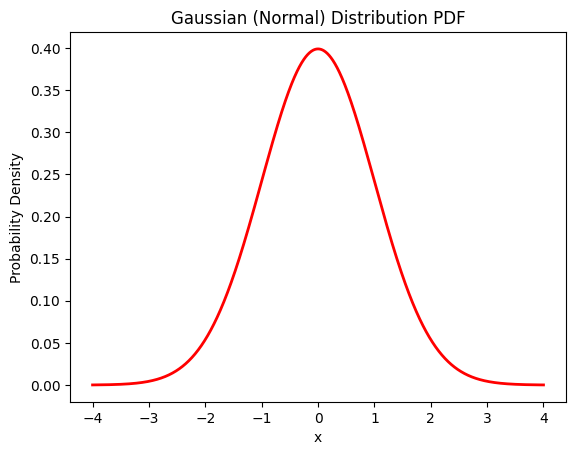

In [10]:
# Gaussian distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define x values over which to plot the PDF (mean 0, std 1)
x = np.linspace(-4, 4, 1000)

# Calculate the Gaussian PDF values at each x
pdf = norm.pdf(x, loc=0, scale=1)

# Plot the PDF curve
plt.plot(x, pdf, 'r-', lw=2)

# Add title and labels
plt.title("Gaussian (Normal) Distribution PDF")
plt.xlabel("x")
plt.ylabel("Probability Density")

# Save the plot
plt.savefig("gaussian_pdf_only.png")
plt.show()


In [ ]:
# lagged_fibonacci_algorithm.py
import numpy as np
x0=1
x1=1
m=2**32

for i in range(1, 101):
    x = np.mod((x0 + x1), m)
    x0 = x1
    x1 = x
    print(x)

In [ ]:
# linear_congruential_generator.py
import numpy as np
a = 2
c = 4
m = 5
x = 3

for i in range(1, 17):
    x = np.mod((a * x + c), m)
    print(x)

In [ ]:
# learmouth_lewis_generator.py
import numpy as np
a = 75
c = 0
m = 2**31 - 1
x = 0.1

for i in range(1, 100):
    x = np.mod((a * x + c), m)
    u = x / m
    print(u)

In [ ]:
# uniformity_test.py
import numpy as np
import matplotlib.pyplot as plt

a = 75
c = 0
m = 2**31 - 1
x = 0.1
u = np.array([])

for i in range(100):
    x = np.mod((a * x + c), m)
    u = np.append(u, x / m)
    print(u[i])

N = 100
s = 20
Ns = N / s
S = np.arange(0, 1, 0.05)
counts = np.empty(S.shape, dtype=int)
V = 0
for i in range(20):
    counts[i] = len(np.where((u >= S[i]) & (u < S[i] + 0.05))[0])
    V += (counts[i] - Ns) ** 2 / Ns

print('R =', counts)
print('V =', V)

plt.bar(np.arange(len(counts)), counts)
plt.show()

In [ ]:
# encript_decript_strings.py
from cryptography.fernet import Fernet

title = 'Simulation Modeling with Python'
secret_key = Fernet.generate_key()
fernet_obj = Fernet(secret_key)
enc_title = fernet_obj.encrypt(title.encode())
print('Title encrypted =', enc_title)
dec_title = fernet_obj.decrypt(enc_title).decode()
print('Title decrypted =', dec_title)

In [ ]:
# random_password_generator.py
import string
import random

char_set = list(string.ascii_letters + string.digits + '()!$%^&*@#')
password_length = 10
random.shuffle(char_set)
password = [random.choice(char_set) for _ in range(password_length)]
random.shuffle(password)
print(''.join(password))

In [ ]:
# random_generation.py
import random

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

random.seed(1)
for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

for i in range(20):
    print('%6.4f' % random.uniform(1, 100), end=' ')
print()

for i in range(20):
    print(random.randint(-100, 100), end=' ')
print()

for i in range(20):
    print(random.randrange(0, 100, 5), end=' ')
print()

CitiesList = ['Rome','New York','London','Berlin','Moskov','Los Angeles','Paris','Madrid','Tokio','Toronto']
for i in range(10):
    print('Random City:', random.choice(CitiesList))
DataList = range(10,100,10)
print('Sample:', random.sample(DataList, k=5))